In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import seaborn as sns

In [290]:
# a1 = pd.read_excel('case_study1.xlsx')
# a2 = pd.read_excel('case_study2.xlsx')

In [291]:
df1 = a1.copy()
df2 = a2.copy()

In [292]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


TL = Trade Line

In [293]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


### Working on df1 (BoB internal Data)

In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [295]:
df1.isnull().sum()  

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [296]:
df1 = df1.replace(-99999.000,np.nan)

In [297]:
df1.isnull().sum()

PROSPECTID               0
Total_TL                 0
Tot_Closed_TL            0
Tot_Active_TL            0
Total_TL_opened_L6M      0
Tot_TL_closed_L6M        0
pct_tl_open_L6M          0
pct_tl_closed_L6M        0
pct_active_tl            0
pct_closed_tl            0
Total_TL_opened_L12M     0
Tot_TL_closed_L12M       0
pct_tl_open_L12M         0
pct_tl_closed_L12M       0
Tot_Missed_Pmnt          0
Auto_TL                  0
CC_TL                    0
Consumer_TL              0
Gold_TL                  0
Home_TL                  0
PL_TL                    0
Secured_TL               0
Unsecured_TL             0
Other_TL                 0
Age_Oldest_TL           40
Age_Newest_TL           40
dtype: int64

In [298]:
df1 = df1.dropna()

In [299]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

### Working on df2 (Cibil Data)

In [300]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [301]:
df2.isnull().sum()

PROSPECTID                      0
time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 62, dtype: int64

In [302]:
df2 = df2.replace(-99999.000,np.nan)    

In [303]:
cols_to_be_dropped = []

for col in df2.columns:
    if df2[col].isnull().sum() > 10000:
        cols_to_be_dropped.append(col)  
        df2 = df2.drop(col,axis=1)

In [ ]:
cols_to_be_dropped

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [ ]:
df2.isnull().sum()

PROSPECTID                       0
time_since_recent_payment     4291
num_times_delinquent             0
max_recent_level_of_deliq        0
num_deliq_6mts                   0
num_deliq_12mts                  0
num_deliq_6_12mts                0
num_times_30p_dpd                0
num_times_60p_dpd                0
num_std                          0
num_std_6mts                     0
num_std_12mts                    0
num_sub                          0
num_sub_6mts                     0
num_sub_12mts                    0
num_dbt                          0
num_dbt_6mts                     0
num_dbt_12mts                    0
num_lss                          0
num_lss_6mts                     0
num_lss_12mts                    0
recent_level_of_deliq            0
tot_enq                       6321
CC_enq                        6321
CC_enq_L6m                    6321
CC_enq_L12m                   6321
PL_enq                        6321
PL_enq_L6m                    6321
PL_enq_L12m         

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isnull().sum()  

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [ ]:
df2.shape

(42066, 54)

### Merging both datasets

In [ ]:
for i in df1.columns:
    for j in df2.columns:
        if i==j:
            print(i)

PROSPECTID


In [ ]:
df = pd.merge(df1,df2,on='PROSPECTID')

In [ ]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.0,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3


In [ ]:
df.shape

(42064, 79)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
cat_cols = df.select_dtypes(include='object').columns   
num_cols = df.select_dtypes(include=['int64','float64']).columns    

print("Categorical columns are: ",cat_cols)
print("Numerical columns are: ",num_cols)   

Categorical columns are:  Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'],
      dtype='object')
Numerical columns are:  Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12

### Categorical Columns

In [ ]:
for col in cat_cols:
    print(df[col].value_counts())  
    print() 

MARITALSTATUS
Married    30886
Single     11178
Name: count, dtype: int64

EDUCATION
GRADUATE          14140
12TH              11703
SSC                7241
UNDER GRADUATE     4572
OTHERS             2291
POST-GRADUATE      1898
PROFESSIONAL        219
Name: count, dtype: int64

GENDER
M    37345
F     4719
Name: count, dtype: int64

last_prod_enq2
ConsumerLoan    16480
others          13653
PL               7553
CC               2195
AL               1353
HL                830
Name: count, dtype: int64

first_prod_enq2
others          20640
ConsumerLoan    11075
PL               4431
AL               2641
CC               1988
HL               1289
Name: count, dtype: int64

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64



In [ ]:
cat_cols = cat_cols.drop('Approved_Flag')
cat_cols

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

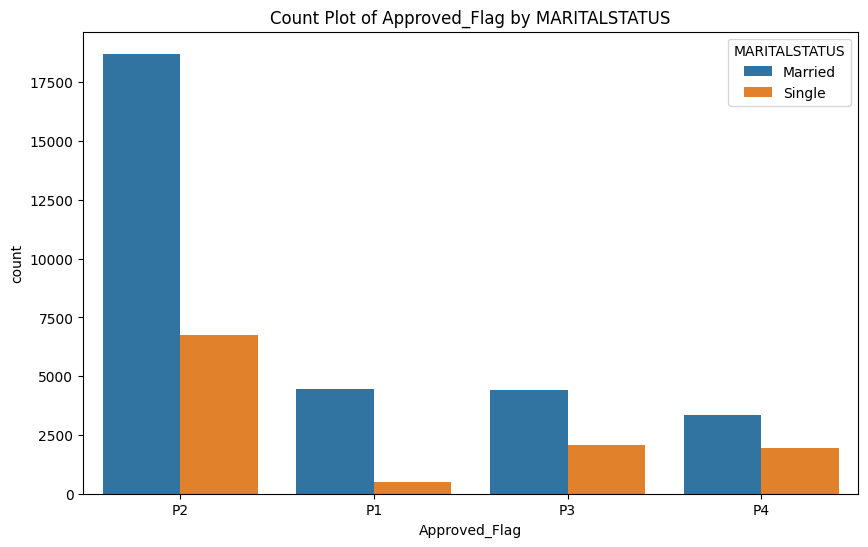

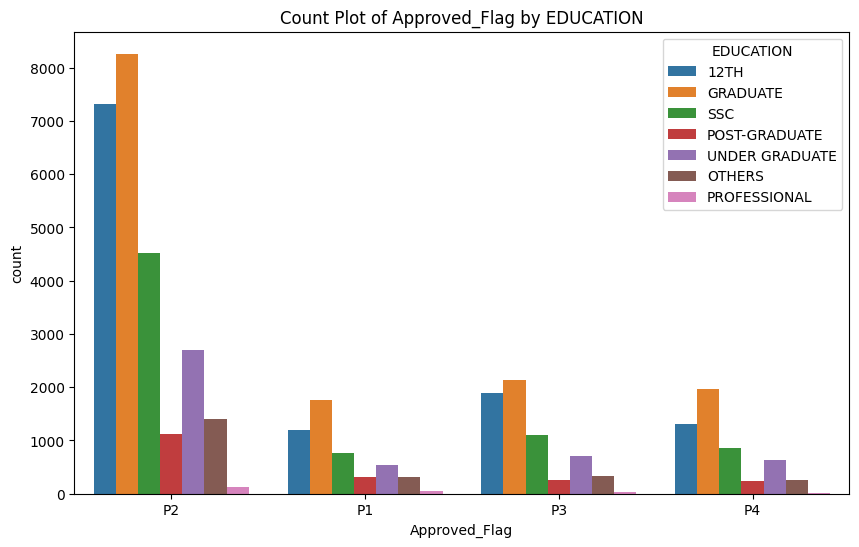

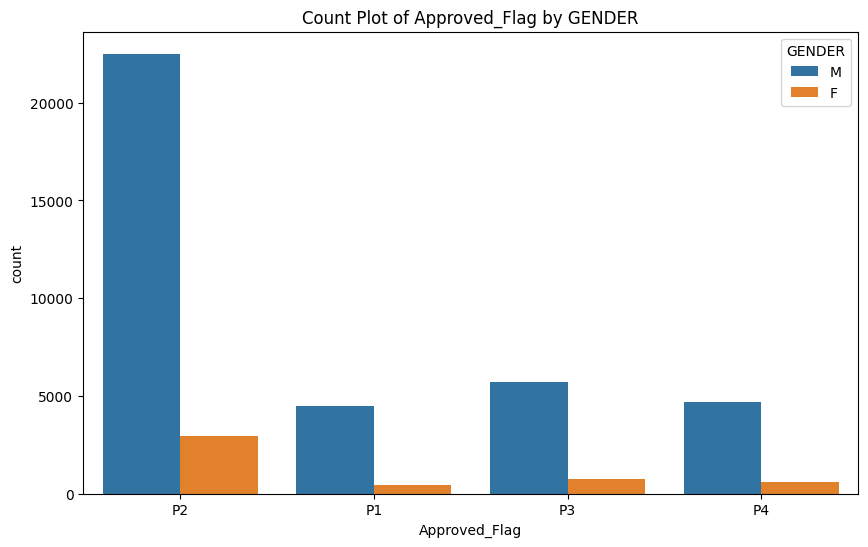

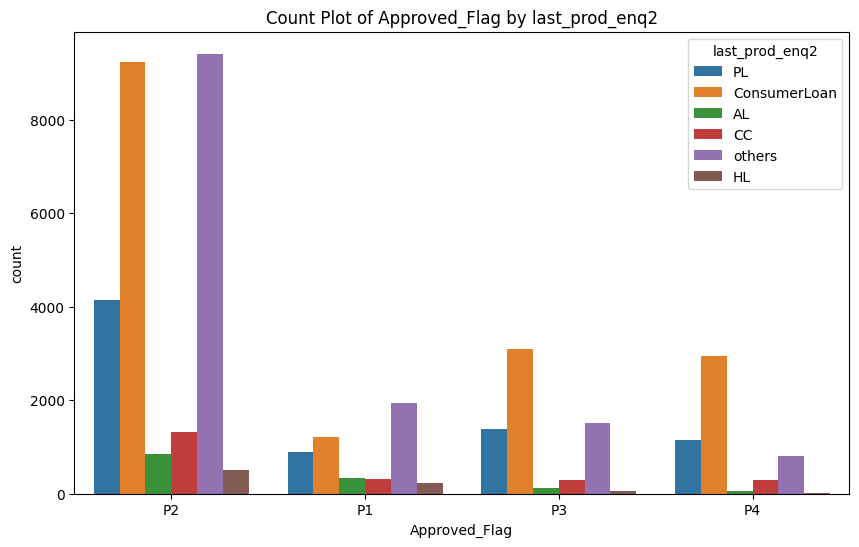

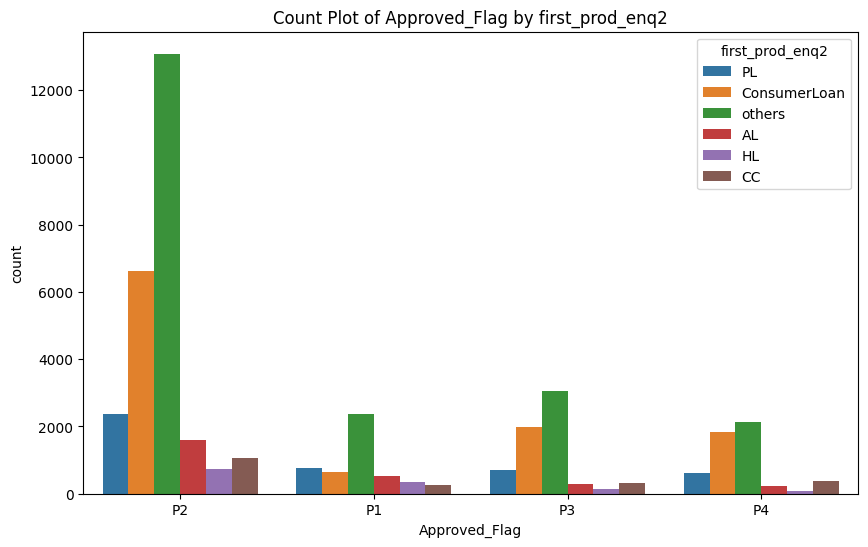

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Approved_Flag', hue=col, data=df)
    plt.title(f'Count Plot of Approved_Flag by {col}')
    plt.show()

### Chi Square Test (Approved_Flag vs MARITALSTATUS)

Ho : No association 

H1 : Association

Significance Level a = 5%  (Margin of Error)

Confidence Interval CI = 95%

Calculate the evidence against Ho using Pvalue

if Pvalue <= a:
    Ho rejected
else:
    Failed to reject Ho

### When to use which test

1. Chi-Square = Cat vs Cat
2. T-test = Cat vs Num (Categores <= 2) eg: Male and Female
3. Anova = Cat vs Num   (Categories >= 3) eg: P1,P2,P3 and P4

In [ ]:
columns_to_be_kept_categorical = []
for i in cat_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    if pval <= 0.05:
        columns_to_be_kept_categorical.append(i)
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [ ]:
columns_to_be_kept_categorical

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

Feature Selection using P-value

all value are below 0.05 so we accept all features

### Numerical Columns

Multicollinearity vs Correlation

Multicollinearity = predictability of one feature using other featuers

Correlation = Relation of one feature with other features (positive , negative or no relation)

Multicollinearity is preferred because correlation only explain linear relations which can be missleading

In [ ]:
num_cols = num_cols.drop('PROSPECTID')
num_cols

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment',
       'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'num_times_30p_dpd',
       'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts',
       'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_6mts',
       'num_dbt_12mts', 'num_lss', 'num_lss_6mts', 'num_lss_12mts',
       'recent_level_of_deliq', 'tot_enq', 'CC_enq', 'CC_enq_L6m',
       'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_sinc

In [ ]:
len(num_cols)

72

Multicollinearity using VIF(Variance Inflation Factor) for numerical features associaiton

In [ ]:
vif_data.shape

(42064, 39)

In [ ]:
vif_data = df[num_cols]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0



for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( num_cols[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ num_cols[i] ] , axis=1)


c:\Users\ASUS\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0 --- inf


c:\Users\ASUS\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


c:\Users\ASUS\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646739
3 --- 5.5813520096427585
4 --- 1.985584353098778


c:\Users\ASUS\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.0646584155234238
8 --- 2.898639771299253
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


c:\Users\ASUS\Miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040112
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24 --- 6.458218003637277
24 --- 2.8474118865638265
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654654
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512906
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561301
32 --- 1.001151196262562
33 --- 3.069197305397274
34 --- 2.8091261600643715
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.833164974053

In [ ]:
columns_to_be_kept

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

ANOVA check to shortlisted 39 columns of numerical variables to check features association with target feature

In [ ]:
from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [ ]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [ ]:
len(columns_to_be_kept_numerical)

37

In [ ]:
features = columns_to_be_kept_numerical + columns_to_be_kept_categorical    
df = df[features + ['Approved_Flag']]

### Cat_cols to Num_cols

In [ ]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3


In [ ]:

df['EDUCATION'].value_counts()


EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [ ]:
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  float64
 12  Age_Newest_TL              42064 non-null  float64
 13  time_since_recent_payment  42064 non-null  flo

In [ ]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [ ]:
df_encoded.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  float64
 12  Age_Newest_TL                 42064 non-null  float64
 13  t

In [ ]:
k = df_encoded.describe()
k

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,...,42064.000000,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,...,1.230458,2.692990e+04,110.345783,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,...,2.069461,2.084300e+04,75.629967,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,2.400000e+04,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.333000,0.100000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,3.100000e+04,131.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,33.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,55.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
df_encoded.shape

(42064, 55)

In [ ]:
df_encoded.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,False,False,True,False,False,False,False,False,True,False
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,False,False
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,True,False,False,False,False,False,False,False,False,True
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,False,False,False,False,True,False,False,False,False,False
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
df_encoded.Approved_Flag.value_counts() 

Approved_Flag
P2    25452
P3     6440
P4     5264
P1     4908
Name: count, dtype: int64

<Axes: xlabel='Approved_Flag', ylabel='count'>

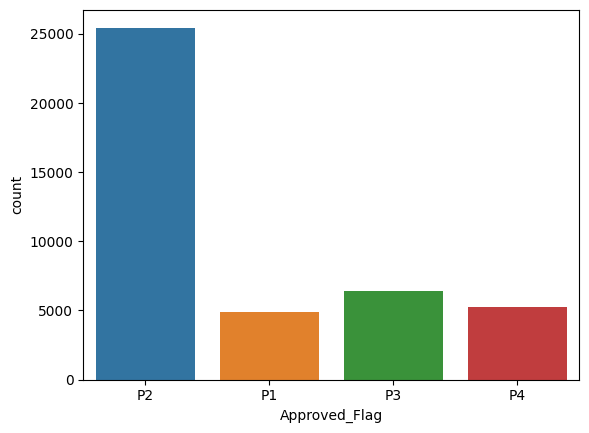

In [ ]:
sns.countplot(data=df_encoded, x='Approved_Flag')

### Modeling

In [ ]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [330]:
y

0        P2
1        P2
2        P2
3        P1
4        P3
         ..
42059    P4
42060    P1
42061    P3
42062    P2
42063    P2
Name: Approved_Flag, Length: 42064, dtype: object

In [332]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [333]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

In [334]:

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [335]:
y_pred = rf_classifier.predict(x_test)

In [336]:
y_pred

array(['P2', 'P4', 'P2', ..., 'P3', 'P2', 'P4'], dtype=object)

In [337]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()



Accuracy: 0.7634613098775704



In [338]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

In [339]:
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.835873388042204
Recall: 0.703155818540434
F1 Score: 0.763792179967863

Class p2:
Precision: 0.7956861413043478
Recall: 0.9286422200198216
F1 Score: 0.8570383243391566

Class p3:
Precision: 0.4410828025477707
Recall: 0.2090566037735849
F1 Score: 0.28366615463389655

Class p4:
Precision: 0.7164750957854407
Recall: 0.7269193391642371
F1 Score: 0.7216594307766522



In [340]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78

Class p1:
Precision: 0.8272532188841202
Recall: 0.7603550295857988
F1 Score: 0.7923946557040081

Class p2:
Precision: 0.8244766505636071
Recall: 0.9133795837462835
F1 Score: 0.8666541282678203

Class p3:
Precision: 0.4555940023068051
Recall: 0.2981132075471698
F1 Score: 0.36040145985401456

Class p4:
Precision: 0.7297560975609756
Recall: 0.7269193391642371
F1 Score: 0.7283349561830574



In [341]:
y_pred

array([1, 3, 1, ..., 2, 1, 3])

In [323]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()









Accuracy: 0.71

Class p1:
Precision: 0.7208619000979432
Recall: 0.7258382642998028
F1 Score: 0.7233415233415234

Class p2:
Precision: 0.8118059614260666
Recall: 0.8259663032705649
F1 Score: 0.8188249164865395

Class p3:
Precision: 0.3424336973478939
Recall: 0.33132075471698114
F1 Score: 0.3367855772919064

Class p4:
Precision: 0.654042988741044
Recall: 0.6209912536443148
F1 Score: 0.6370887337986042



### Scaling 

XGBoost performed best so we'll be moving forward with it

In [324]:
from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

In [325]:
for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [326]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [327]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [328]:
y_pred

array([1, 3, 1, ..., 2, 1, 3])

In [329]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()
    

Class p1:
Precision: 0.8272532188841202
Recall: 0.7603550295857988
F1 Score: 0.7923946557040081

Class p2:
Precision: 0.8244766505636071
Recall: 0.9133795837462835
F1 Score: 0.8666541282678203

Class p3:
Precision: 0.4555940023068051
Recall: 0.2981132075471698
F1 Score: 0.36040145985401456

Class p4:
Precision: 0.7297560975609756
Recall: 0.7269193391642371
F1 Score: 0.7283349561830574



No significant changes

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.779983359087127


In [ ]:
# Evaluate the model with the best hyperparameters on the train set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_train, y_train)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.8058898695432528


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

In [ ]:
x_train.shape

(33651, 54)

### Unseen dataset

In [304]:
a3 = pd.read_excel("Material_Session04/Unseen_Dataset.xlsx")  
a3.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL


In [305]:
cols_in_df = list(df.columns)
cols_in_df


['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag',
 'MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [306]:
cols_in_df.remove('Approved_Flag')     
cols_in_df

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag',
 'MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2']

In [307]:
len(cols_in_df)

42

In [308]:
df_unseen = a3[cols_in_df]

In [309]:
df_unseen.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL


In [310]:
df_unseen.loc[df_unseen['EDUCATION'] == 'SSC',['EDUCATION']]              = 1   
df_unseen.loc[df_unseen['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df_unseen.loc[df_unseen['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df_unseen.loc[df_unseen['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df_unseen.loc[df_unseen['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [311]:
df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            100 non-null    float64
 1   pct_tl_closed_L6M          100 non-null    float64
 2   Tot_TL_closed_L12M         100 non-null    int64  
 3   pct_tl_closed_L12M         100 non-null    float64
 4   Tot_Missed_Pmnt            100 non-null    int64  
 5   CC_TL                      100 non-null    int64  
 6   Home_TL                    100 non-null    int64  
 7   PL_TL                      100 non-null    int64  
 8   Secured_TL                 100 non-null    int64  
 9   Unsecured_TL               100 non-null    int64  
 10  Other_TL                   100 non-null    int64  
 11  Age_Oldest_TL              100 non-null    int64  
 12  Age_Newest_TL              100 non-null    int64  
 13  time_since_recent_payment  100 non-null    int64  


In [312]:
df_unseen_encoded = pd.get_dummies(df_unseen, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])  

In [313]:
df_unseen_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               100 non-null    float64
 1   pct_tl_closed_L6M             100 non-null    float64
 2   Tot_TL_closed_L12M            100 non-null    int64  
 3   pct_tl_closed_L12M            100 non-null    float64
 4   Tot_Missed_Pmnt               100 non-null    int64  
 5   CC_TL                         100 non-null    int64  
 6   Home_TL                       100 non-null    int64  
 7   PL_TL                         100 non-null    int64  
 8   Secured_TL                    100 non-null    int64  
 9   Unsecured_TL                  100 non-null    int64  
 10  Other_TL                      100 non-null    int64  
 11  Age_Oldest_TL                 100 non-null    int64  
 12  Age_Newest_TL                 100 non-null    int64  
 13  time_s

In [342]:
y_pred_unseen=best_model.predict(df_unseen_encoded)    

In [343]:
a3['Target'] = y_pred_unseen    

In [344]:
a3.to_excel('Material_Session04/Unseen_Dataset_with_predictions.xlsx', index=False) 

In [345]:
ans = pd.read_excel("Material_Session04/Unseen_Dataset_with_predictions.xlsx")      
ans.head()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Target
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,0.000,0.0,1,0,Married,12TH,M,PL,PL,0
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,0
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,0
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,0
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,0


In [346]:
ans.Target.value_counts()   

Target
0    82
2    12
1     6
Name: count, dtype: int64